**Problem Statement**
The wine dataset is a popular benchmark dataset in machine learning, containing information about different types of wines. The problem statement for DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is to identify clusters of data points based on their density, while hierarchical clustering aims to group similar data points into hierarchical structures. Both algorithms are commonly used for unsupervised learning tasks in clustering analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/dataset1_wine.csv", encoding='ISO-8859-1')

**DESCRIPTION OF THE DATASET**

In [ ]:
df.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,proline,Magnesium,Flavanoids,Alcalinity of ash,Malic acid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Inference:
Manually added the column name in

In [ ]:
df.shape

(178, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               178 non-null    int64  
 1   fixed acidity         178 non-null    float64
 2   volatile acidity      178 non-null    float64
 3   citric acid           178 non-null    float64
 4   residual sugar        178 non-null    float64
 5   chlorides             178 non-null    int64  
 6   free sulfur dioxide   178 non-null    float64
 7   total sulfur dioxide  178 non-null    float64
 8   pH                    178 non-null    float64
 9   proline               178 non-null    float64
 10   Magnesium            178 non-null    float64
 11  Flavanoids            178 non-null    float64
 12   Alcalinity of ash    178 non-null    float64
 13  Malic acid            178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**INFERENCE:**
All the columns are numerical in the dataset. And there is no null values in the dataset.

In [ ]:
df.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,proline,Magnesium,Flavanoids,Alcalinity of ash,Malic acid
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**INFERENCE:**


**CHECKING FOR NULL VALUES**

In [ ]:
df.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
proline                 0
 Magnesium              0
Flavanoids              0
 Alcalinity of ash      0
Malic acid              0
dtype: int64

**Exploratory Data Analysis**

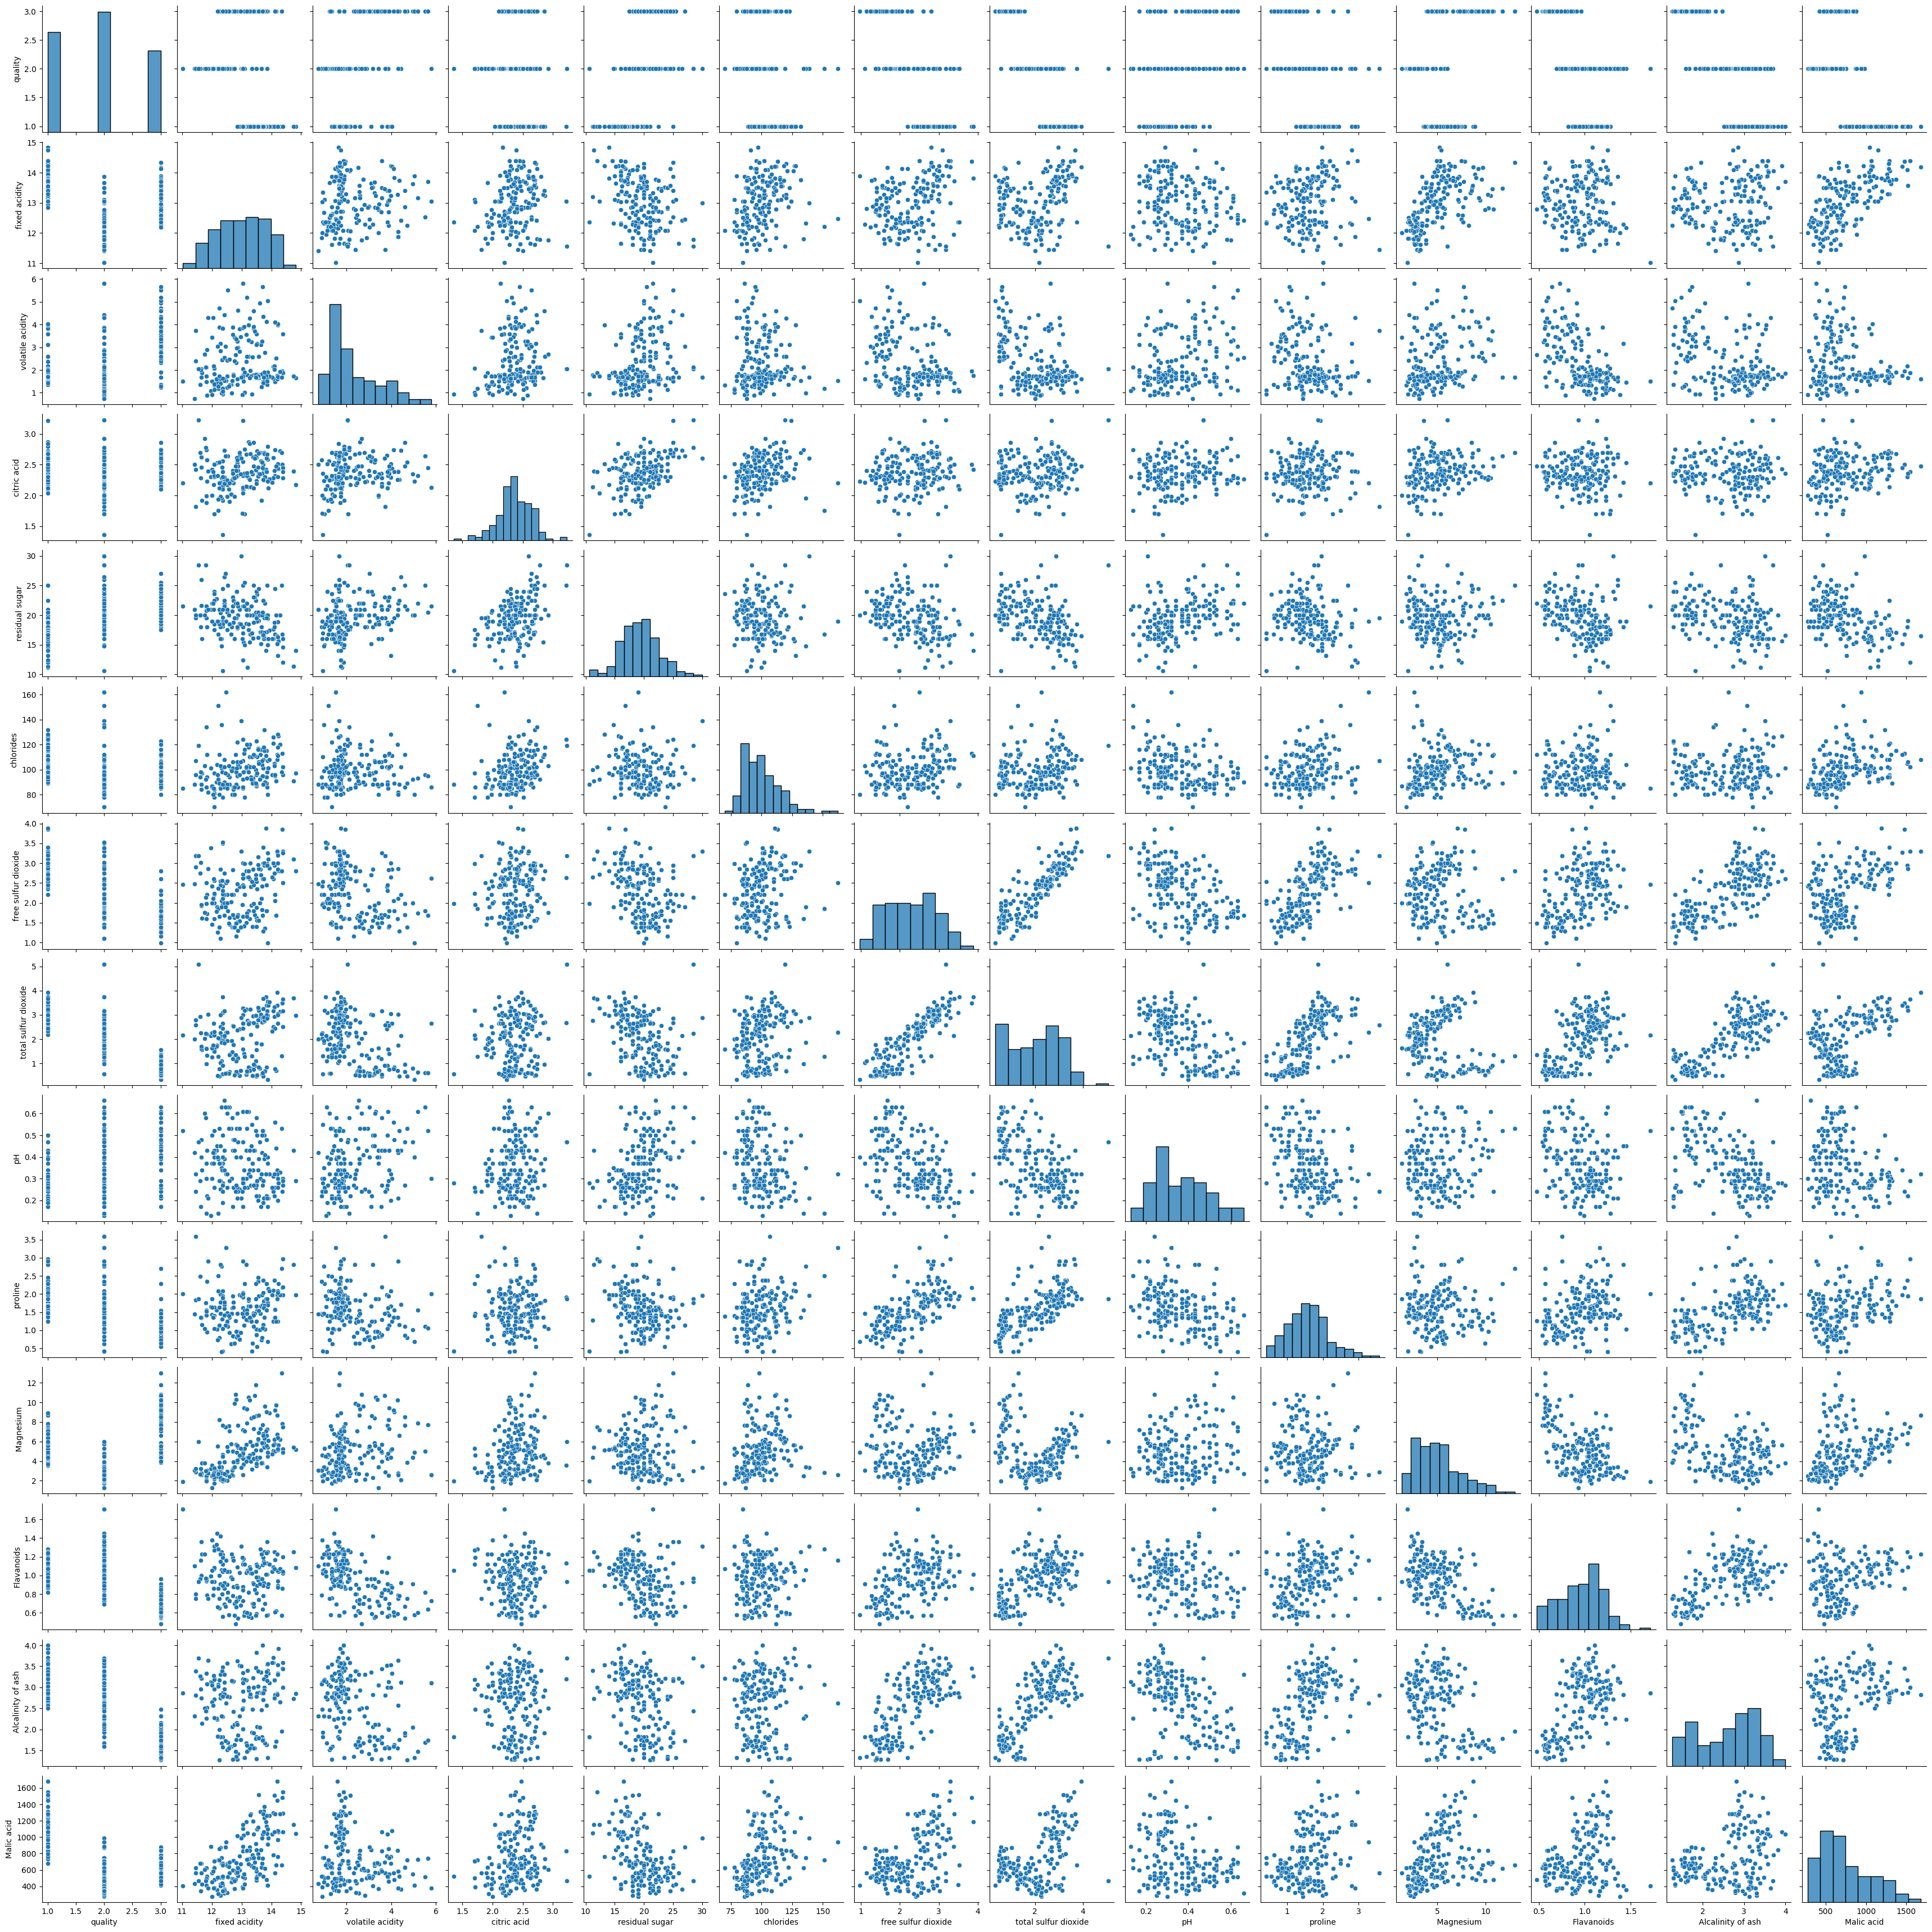

In [ ]:
sns.pairplot(df)

**INFERENCE:**
We can infere that the some columns are lineary distributed.

<Axes: title={'center': 'Quality of wine'}>

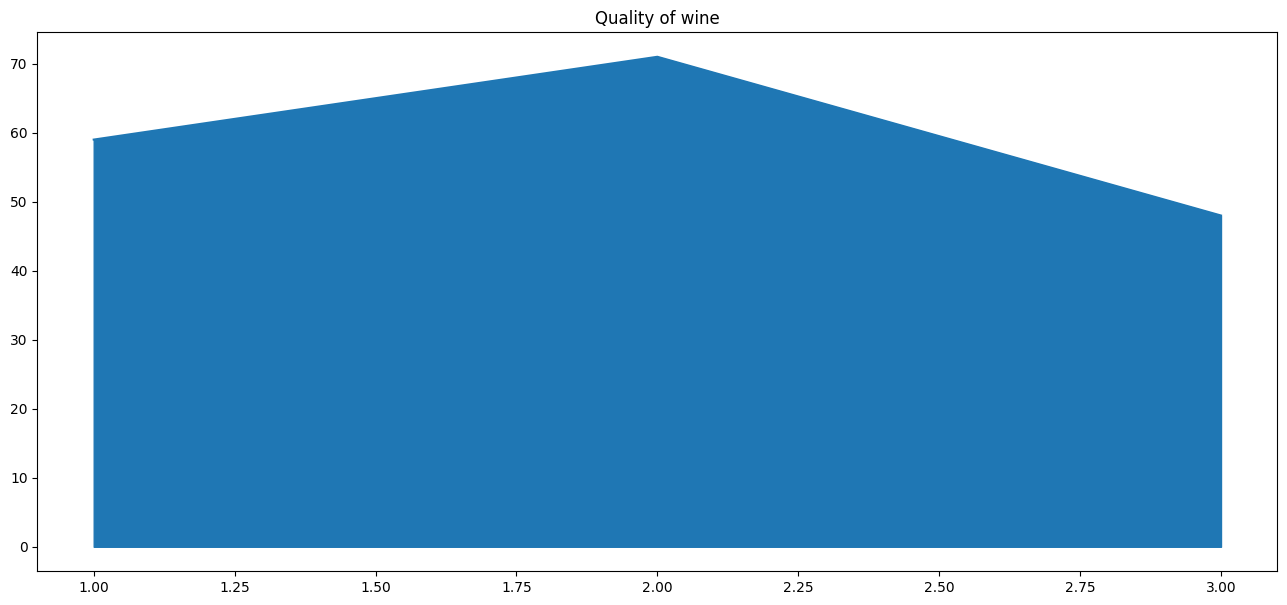

In [ ]:
df['quality'].value_counts().sort_index().plot.area(
    figsize = (16,7),
    title = 'Quality of wine'
)

<Axes: >

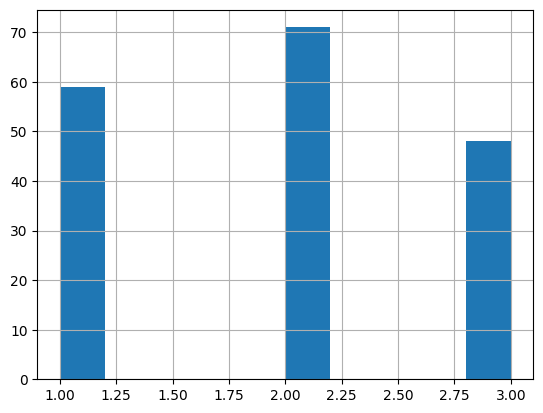

In [ ]:
df['quality'].hist()

**INFERENCE:**
The quality of the wine column is plotted and infered that there are three columns that is three quality 1,2 and 3 the categories are some what equally distributed.

<Axes: >

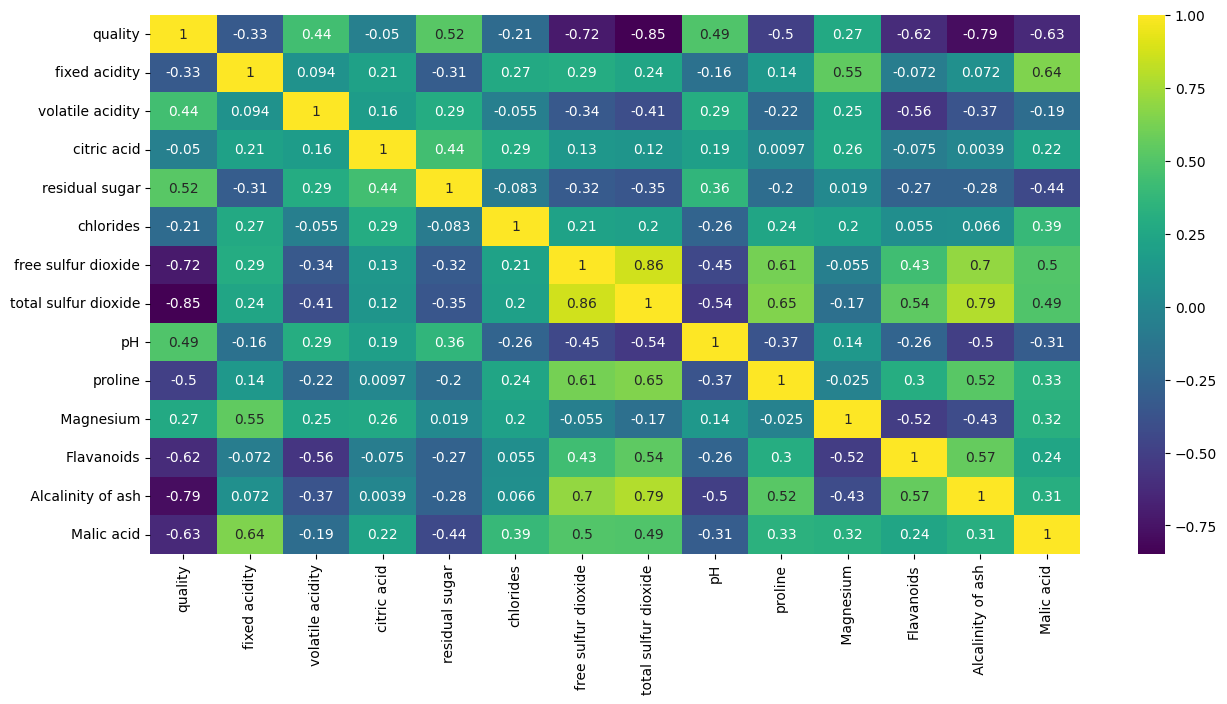

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),cmap='viridis', annot=True)

**Inference**
To use linear regression for modelling,its necessary to remove correlated variables to improve your model. One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

Dark shades represents positive correlation while lighter shades represents negative correlation. If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.

1. From this graph we can infer that proline and citric acid has no correlation.
2. where as quality and total sulpur dioxide has more correlation.

In [ ]:
x = df.drop(["quality"],axis =1)
y = df["quality"]

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
#Normalizing the Data
normalized_df = normalize(scaled_df)
# Converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)

**PCA**

To reduce the dimension of the dataset we are using PCA


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [ ]:
X_principal.head(2)

,P1,P2
0,-0.842093,-0.317917
1,-0.685366,0.074972


**Dendograms**
are used to divide a given cluster into many different clusters.

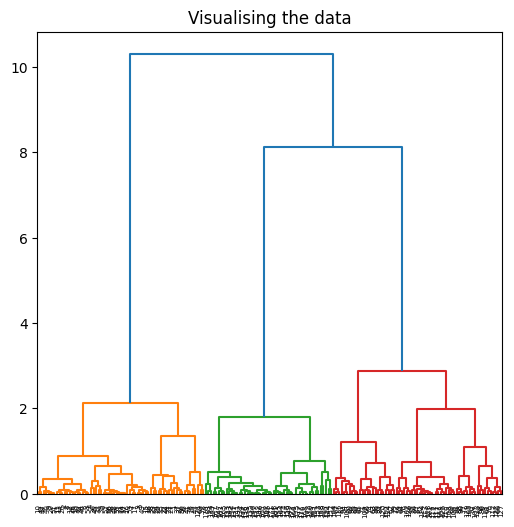

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(6, 6))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

**Inference:**
From the above dendograms we can go for three clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))

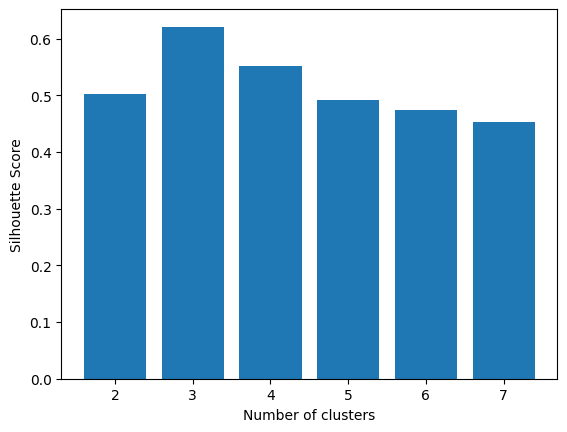

In [ ]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

**INFERENCE:**
The number of cluster is 3 we got it by iterating the cluster number from 2 to 7, when cluster number is 3 the Silhouette Score is high which means when the number of cluster is 3 the differention within the cluster and between cluster is more.

**hierarchical clustering**

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

In [ ]:
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',connectivity=None, distance_threshold=None,
linkage='ward', memory=None, n_clusters=3)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

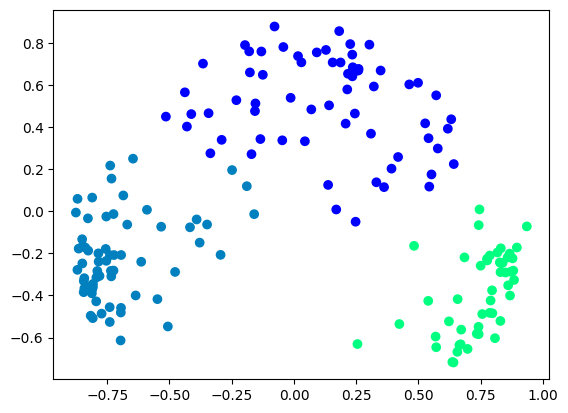

In [ ]:
# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter)
plt.show()

**Inference:**
for three quality of wine the hierarchical clustering clusters has separated the group and gave it.

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

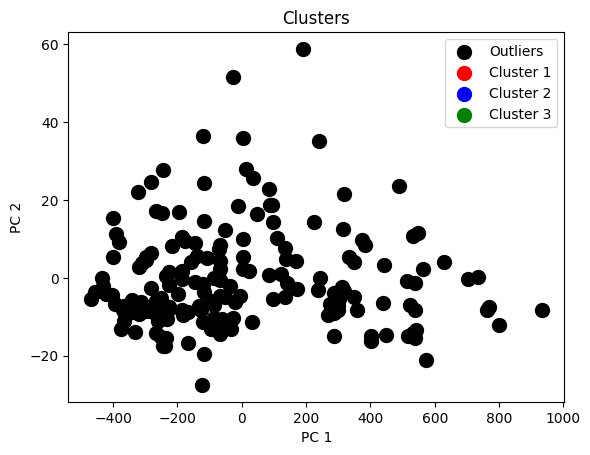

In [ ]:
# perform PCA on the dataset
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

# apply DBSCAN clustering on the reduced dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_reduced)

# plot the clusters
plt.scatter(X_reduced[dbscan.labels_ == -1, 0], X_reduced[dbscan.labels_ == -1, 1], s=100, c='black', label='Outliers')
plt.scatter(X_reduced[dbscan.labels_ == 0, 0], X_reduced[dbscan.labels_ == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_reduced[dbscan.labels_ == 1, 0], X_reduced[dbscan.labels_ == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_reduced[dbscan.labels_ == 2, 0], X_reduced[dbscan.labels_ == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()


In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 178


**INFERENCE:**
In the above implementation DBscan is not forming clusters it is taking all the clusters has outliear.Therefore Hierarchical clustering is the best approch.